# Face Recongination with Images Dataset using OpenCV and VGG16 Transfer Learning

### Purpose

- Import essential libraries and modules required for:
  - Numerical computation and array manipulations (`numpy`).
  - Image processing and computer vision (`cv2`).
  - Data visualization (`matplotlib.pyplot`).
  - Deep learning model creation, training, and preprocessing, specifically using the VGG16 architecture from TensorFlow/Keras.
  - Dataset loading, augmentation, splitting, and evaluation metrics from scikit-learn.
  - Handling warnings to keep output clean during experimentation.

### Meaning

- These imports together form the foundation for building an image classification pipeline, covering data loading, preprocessing, model building with transfer learning (VGG16), training with optimizers, data augmentation, splitting datasets into training/testing, and evaluating classification performance with standard metrics.
  
- The `warnings.filterwarnings('ignore')` suppresses non-critical warnings that might clutter notebook or script outputs, aiding focus on key insights.

### Summary Table

| Library/Module                              | Purpose/Use                                        | Explanation/Role                                                                                      |
|--------------------------------------------|--------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| `numpy`                                    | Numerical operations                              | Efficient handling of multi-dimensional arrays and matrices, essential for ML data manipulation    |
| `cv2` (OpenCV)                             | Image processing                                 | Reading, converting, and manipulating images; core for computer vision pre-processing                |
| `matplotlib.pyplot`                        | Data visualization                               | Plotting results, visualizing images, training history, and evaluation metrics                       |
| `tensorflow.keras.applications.VGG16`     | Pre-trained CNN model                            | Transfer learning using VGG16 for feature extraction and classification in image tasks              |
| `tensorflow.keras.applications.vgg16.preprocess_input` | Preprocessing input images                       | Converts images to format expected by VGG16 (pixel scaling, normalization)                          |
| `tensorflow.keras.preprocessing.image`    | Image loading and preparation                     | Methods like `load_img`, `img_to_array` convert images to arrays for model input                     |
| `tensorflow.keras.models.Model`            | Define/modify neural network architecture         | Base class for building custom models and extending pre-trained ones                                |
| `tensorflow.keras.layers`                   | Neural network building blocks                    | Layers like Dense, Flatten, Dropout for model construction and regularization                       |
| `tensorflow.keras.preprocessing.image.ImageDataGenerator` | Real-time data augmentation                      | Increases dataset variability to improve generalization during training                             |
| `tensorflow.keras.optimizers.Adam`          | Optimization algorithm                            | Adam optimizer for adaptive learning rate during model training                                    |
| `sklearn.model_selection.train_test_split` | Dataset splitting                                | Divides datasets into training and testing subsets for unbiased evaluation                          |
| `sklearn.metrics.classification_report`    | Model evaluation metric                           | Generates precision, recall, F1-score, accuracy per class report                                   |
| `sklearn.metrics.confusion_matrix`          | Evaluation metric                                | Confusion matrix to visualize true vs predicted labels                                            |
| `glob`                                      | File path pattern matching                        | Helps retrieve multiple image file paths from directories for batch processing                      |
| `warnings.filterwarnings`                    | Control warning messages                          | Suppresses unimportant warnings to keep logs and outputs clean                                     |

### Summary

These imports collectively support the end-to-end workflow of building and evaluating a robust image classification system using deep learning. They encompass:

- Image handling and preprocessing utilities.
- Transfer learning with pretrained models.
- Model building with customizable layers.
- Training optimization strategies.
- Dataset management and splitting.
- Visualization and performance metrics.
- Batch file system operations for dataset loading.
- Environment output cleanup.

This setup is typical for medical imaging or any domain where VGG16-like convolutional networks are applied for image classification tasks.


#### Import the Libraries

In [3]:
# Import the libraries:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
from glob import glob

# Ignore warnings:
import warnings
warnings.filterwarnings('ignore')

#### **Purpose**
This dataset is intended for **facial recognition and classification tasks** using deep learning or computer vision techniques. It can be used to train models to accurately identify specific individuals from images.

#### **Meaning**
The dataset contains images of **five well-known actors** — Chris Evans, Chris Hemsworth, Mark Ruffalo, Robert Downey Jr, and Scarlett Johansson — organized into **train**, **validation**, and **test** sets. Each set is divided into separate folders for each person, enabling supervised learning for identity classification.

#### **Summary**

* **Classes (People)**:

  * Chris Evans
  * Chris Hemsworth
  * Mark Ruffalo
  * Robert Downey Jr
  * Scarlett Johansson
* **Data Organization**:

  * `train/` → Images for training the model
  * `val/` → Images for validating model performance during training
  * `test/` → Images for final evaluation
* **Applications**:

  * Face recognition systems
  * Celebrity identification
  * Transfer learning for face classification tasks
  * Experimenting with deep learning models like CNNs, VGGFace, or FaceNet


In [4]:
# Resize all the images to this size:
IMAGE_SIZE = (224, 224)

# Import the dataset path:
train_path = 'images/train'  # Update this with your dataset path
test_path = 'images/test'    # Update this with your dataset path


#### Check the Dataset Images

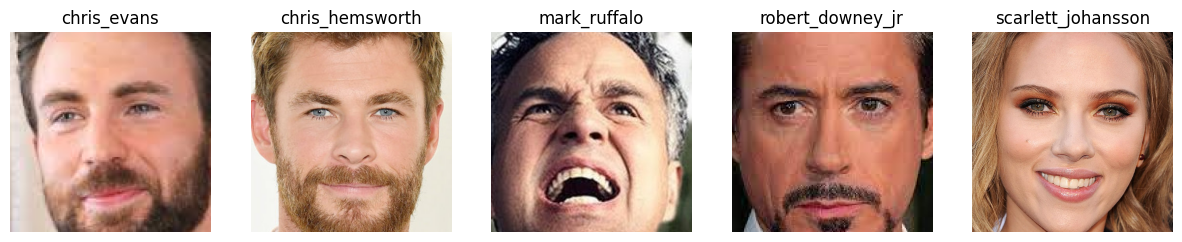

In [13]:
# Check the Images dataset:
import os
import random
# Defining a list of class names for each Avenger
class_names = ["chris_evans", "chris_hemsworth", "mark_ruffalo", "robert_downey_jr", "scarlett_johansson"]

# Initializing an empty list to store the image paths
images = []

# Looping through each class name
for class_name in class_names:
     # Getting a list of image files in the class directory
    image_files = os.listdir(os.path.join(train_path, class_name))
    
    # Selecting a random image file from the list
    image_file = random.choice(image_files) 
    
    # Appending the path of the selected image to the images list
    images.append(os.path.join(train_path, class_name, image_file)) 
# Creating a figure to display the selected images
fig, ax = plt.subplots(1, 5, figsize = (15, 4))

for i in range(5):
    
    ax[i].imshow(plt.imread(images[i]))
    ax[i].set(title = class_names[i])
    ax[i].axis('off')


### Applying the VGG16 Model

In [5]:
# Add the prepocessing layer in fort of the model:

vgg = VGG16(input_shape=IMAGE_SIZE + (3,), include_top=False, weights='imagenet')

# Don't train the base model:
for layer in vgg.layers:
    layer.trainable = False

In [6]:
# Useful for getting the number of classes:
folders = glob(train_path + '/*')

In [7]:
# Import the Flatten layers:
x = Flatten()(vgg.output)

# Predict the number of classes:
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model:
model = Model(inputs=vgg.input, outputs=prediction)

# View the model summary:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │       125,445 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,133 (56.61 MB)

 Trainable params: 125,445 (490.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
# Compile the model:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the data generator:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)

In [10]:
# Train the dataset:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

Found 274 images belonging to 5 classes.


In [11]:
# Test the dataset:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

Found 60 images belonging to 5 classes.


In [12]:
# Fit the model:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 249s 28s/step - accuracy: 0.1992 - loss: 1.6894 - val_accuracy: 0.3167 - val_loss: 1.5259
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 274s 31s/step - accuracy: 0.3333 - loss: 1.5397 - val_accuracy: 0.4000 - val_loss: 1.4300
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 222s 24s/step - accuracy: 0.4355 - loss: 1.4299 - val_accuracy: 0.4833 - val_loss: 1.2859
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 217s 25s/step - accuracy: 0.5169 - loss: 1.3638 - val_accuracy: 0.5333 - val_loss: 1.1965
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 202s 23s/step - accuracy: 0.5934 - loss: 1.2742 - val_accuracy: 0.5833 - val_loss: 1.0845
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 208s 23s/step - accuracy: 0.6672 - loss: 1.1918 - val_accuracy: 0.7000 - val_loss: 1.0104
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 211s 24s/step - accuracy: 0.6439 - loss: 1.1422 - val_accuracy: 0.7667 - val_loss: 0.9208
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 211s 24s/step - accuracy: 0.7155 - loss: 1.0875 - val_accuracy: 0.7167 - val_loss:

In [19]:
# Define the path to your validation dataset directory
validation_data_dir = 'images/val'

# Create an instance of ImageDataGenerator for validation
val_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize pixel values to [0, 1]

# Create the validation generator
val_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),  # Specify your target size
    batch_size=32,  # Define your batch size
    class_mode='categorical',  # Use 'categorical' for multi-class or 'binary' for binary classification
    shuffle=False  # Set shuffle to False to maintain the order of images
)

Found 60 images belonging to 5 classes.


#### Check the Validation Dataset

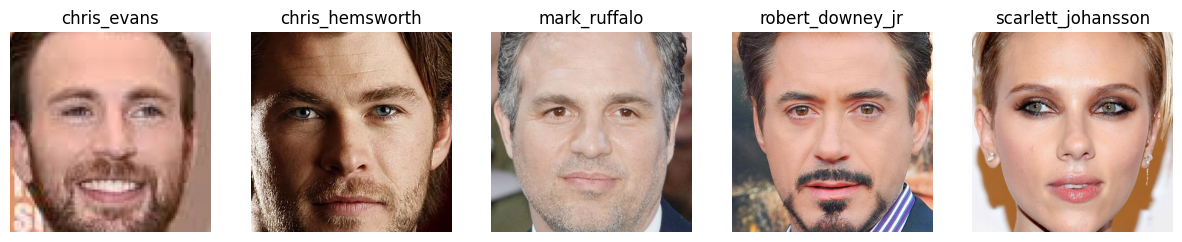

In [26]:
# Check the Images dataset:
import os
import random
# Defining a list of class names for each Avenger
class_names = ["chris_evans", "chris_hemsworth", "mark_ruffalo", "robert_downey_jr", "scarlett_johansson"]

# Initializing an empty list to store the image paths
images = []

# Looping through each class name
for class_name in class_names:
     # Getting a list of image files in the class directory
    image_files = os.listdir(os.path.join(validation_data_dir, class_name))
    
    # Selecting a random image file from the list
    image_file = random.choice(image_files) 
    
    # Appending the path of the selected image to the images list
    images.append(os.path.join(train_path, class_name, image_file)) 
# Creating a figure to display the selected images
fig, ax = plt.subplots(1, 5, figsize = (15, 4))

for i in range(5):
    
    ax[i].imshow(plt.imread(images[i]))
    ax[i].set(title = class_names[i])
    ax[i].axis('off')


### Classification Report of the Trained Dataset

9/9 ━━━━━━━━━━━━━━━━━━━━ 171s 19s/step - accuracy: 0.7646 - loss: 0.9721
2/2 ━━━━━━━━━━━━━━━━━━━━ 39s 18s/step - accuracy: 0.7396 - loss: 0.8157
2/2 ━━━━━━━━━━━━━━━━━━━━ 39s 20s/step - accuracy: 0.7174 - loss: 0.9496
Train Accuracy:  0.7554744482040405
Test Accuracy:  0.75
Validation Accuracy:  0.7166666388511658
2/2 ━━━━━━━━━━━━━━━━━━━━ 43s 18s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 37s 18s/step
Test Classification Report:
                     precision    recall  f1-score   support

       chris_evans       0.22      0.17      0.19        12
   chris_hemsworth       0.20      0.08      0.12        12
      mark_ruffalo       0.18      0.33      0.24        12
  robert_downey_jr       0.20      0.17      0.18        12
scarlett_johansson       0.36      0.42      0.38        12

          accuracy                           0.23        60
         macro avg       0.23      0.23      0.22        60
      weighted avg       0.23      0.23      0.22        60

Validation Classification Report:
   

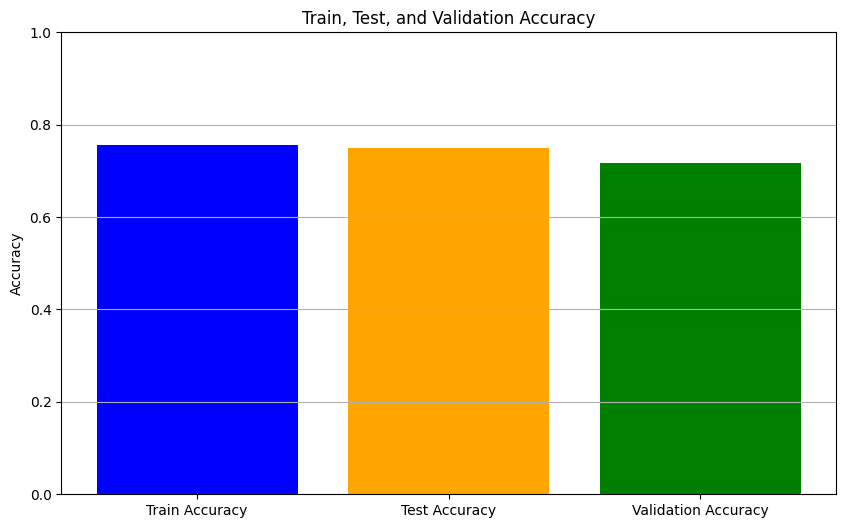

In [27]:
# Make a Evaluation Matric of Dataset train_generator and test_generator:
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Evaluate the model on train, test, and validation datasets
train_loss, train_accuracy = model.evaluate(train_generator)
test_loss, test_accuracy = model.evaluate(test_generator)
val_loss, val_accuracy = model.evaluate(val_generator)

# Print accuracies
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("Validation Accuracy: ", val_accuracy)

# Get true labels and predictions for test and validation datasets
# Assuming you have a method to get predictions
def get_predictions(generator):
    predictions = model.predict(generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = generator.classes
    return true_classes, predicted_classes

# Get predictions for test and validation datasets
test_true, test_pred = get_predictions(test_generator)
val_true, val_pred = get_predictions(val_generator)

# Generate classification reports
test_report = classification_report(test_true, test_pred, target_names=class_names)
val_report = classification_report(val_true, val_pred, target_names=class_names)

# Print classification reports
print("Test Classification Report:\n", test_report)
print("Validation Classification Report:\n", val_report)

# Data for plotting
accuracies = [train_accuracy, test_accuracy, val_accuracy]
labels = ['Train Accuracy', 'Test Accuracy', 'Validation Accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)  # Set y-axis limits
plt.ylabel('Accuracy')
plt.title('Train, Test, and Validation Accuracy')
plt.grid(axis='y')

# Show the plot
plt.show()

#### Confusion Matrix of Model

Text(0.5, 1.0, 'Confusion Matrix')

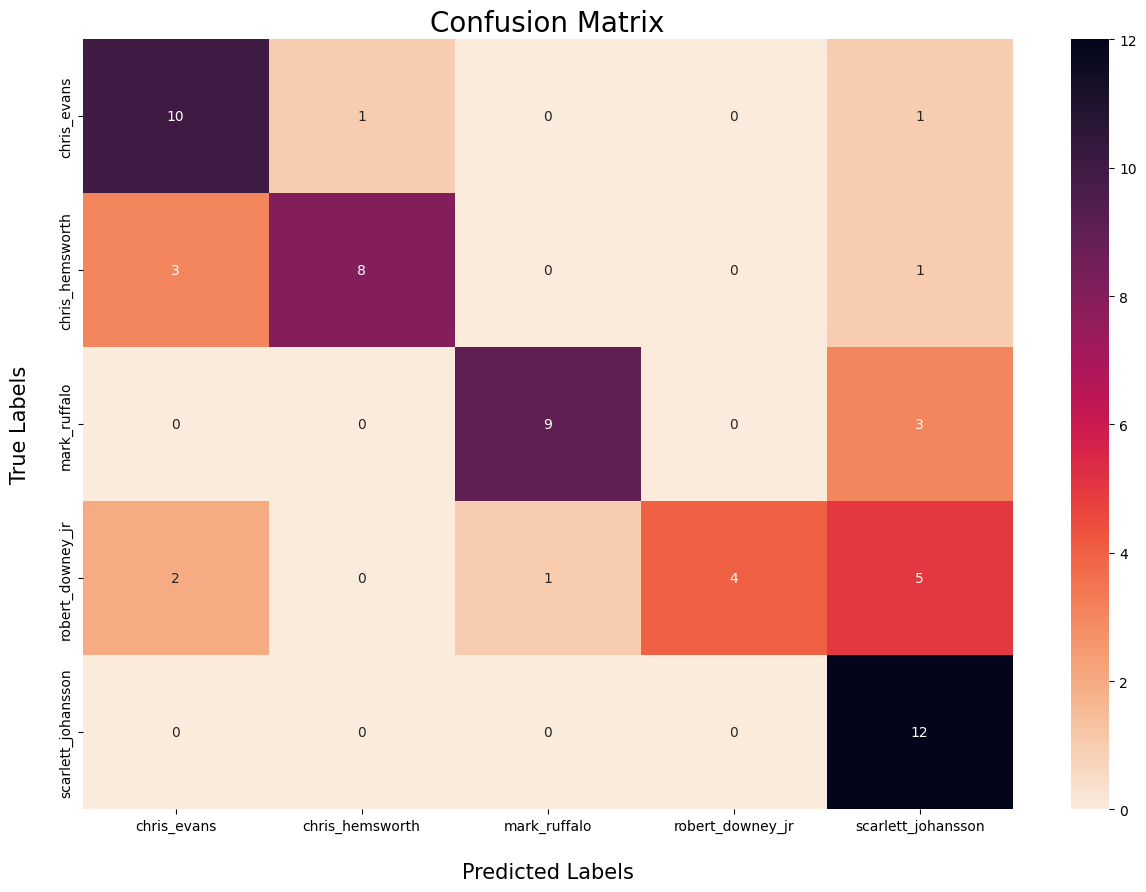

In [30]:
import seaborn as sns
import tensorflow as tf
# Generate the confusion matrix 
cm = tf.math.confusion_matrix(test_true, val_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(cm, annot=True, fmt='', ax = ax, cmap = 'rocket_r')

ax.set_yticklabels(class_names, va="center")
ax.set_xticklabels(class_names, ha="center")
ax.set_xlabel('\nPredicted Labels', fontsize = 15)
ax.set_ylabel('True Labels\n', fontsize = 15)

plt.title("Confusion Matrix", fontsize = 20)

#### Save the Model

In [31]:
# Save the model using vgg19:
# Save the model
model.save('vgg19_model.h5')

print("Model saved as vgg19_model.h5")

Model saved as vgg19_model.h5
